<a href="https://colab.research.google.com/github/drshahizan/Python_EDA/blob/main/Malaysia%20EDA/team%2014/Pixelated_Assignment_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Title - Number of deaths in Malaysia from 2001 to 2018






# Group Members:



 Terence Loorthanathan (A20EC0165)


Rishma Fathima Binti Basher (A20EC0137)

To have effective health systems, nations must be aware of the annual death toll and the major causes of those fatalities. Civil registration is the only means to keep track of all deaths and count everyone. Civil registration not only establishes a person's legal identity but also enables nations to pinpoint their most urgent health problems. 

Therefore the dataset is taken from [Department of Statistics Malaysia Official Portal ](https://www.dosm.gov.my/v1/index.php?r=column3/accordion&menu_id=amZNeW9vTXRydTFwTXAxSmdDL1J4dz09) 

Dataset: Popultation & Demography/Death by state, sex and age group, Malaysia, 2001 - 2018

The dataset contains 11040 records and 5 columns of:

1. Sex (object)      : The gender of the death person (Male or Female)
2. Age group (object): The age group of the death person
3. Year (int64)      : The year of death 
4. State (object)    : The location (States in Malaysia) of death  
5. Number of deaths (float64) : The total number of deaths occured

Challenges that had to be faced when analysing this dataset:

1. Value for Sabah for year 2001-2013 are not published because it is still being studied. However, at the Malaysia level, data for Sabah are included.
2. Only 1 continuous data was present in this dataset, therefore to extract information we had to use every categorical data present and use them in a way to make the continous data meaningful.

## Downloading the Dataset

> The dataset can be viewed in this [link](https://github.com/drshahizan/Python_EDA/blob/5e777394f920fc7877660c907621102085d9a8fc/Malaysia%20EDA/team%2014/Death_by_state_sex_and_age_group_Malaysia_2001-2018.csv)

> The description of the dataset and assignment can be viewed in this  [link](https://github.com/drshahizan/Python_EDA/blob/5e777394f920fc7877660c907621102085d9a8fc/Malaysia%20EDA/team%2014/readme.md)


**Importing Libraries** - The libraries used for this EDA are as below.
Some of it is for fundamental Python tools like pandas and numpy, as well as visualisation tools like seaborn and matplotlib. 

In [1]:
import pandas as pd
import numpy as np

Now the dataset has to be imported, for this case the dataset is stored in GitHub
> The link used is the raw link of the file from github.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Terence172/FirstR/main/Datasets/Deaths_by_State_Malaysia.csv')

Viewing the first Five Rows of the Dataset

In [3]:
df.head()

,Sex,Age group,Year,State,Number of death
0,Male,Under 1 year,2001,Johor,263.0
1,Male,Under 1 year,2001,Kedah,173.0
2,Male,Under 1 year,2001,Kelantan,198.0
3,Male,Under 1 year,2001,Melaka,59.0
4,Male,Under 1 year,2001,Negeri Sembilan,69.0


We have to evaluate this dataset, to see if it fits the criteria that was set.

Criteria Set:
* Dataset must contain at least 5 columns and 1500 rows of data

In [4]:
print("This Dataset Has," , df.shape[0], "Rows" )
print("This Dataset Has," , df.shape[1], "Columns" )

This Dataset Has, 11040 Rows
This Dataset Has, 5 Columns


Data types of each column is crucial for data preperation.

In [5]:
df.dtypes

Sex                 object
Age group           object
Year                 int64
State               object
Number of death    float64
dtype: object

## Data Preparation and Cleaning

**Missing Values** -  Identify whether our dataset contains missing values as a first





To identify if there are any null values in each column.


In [6]:
df.isna().sum()

Sex                  0
Age group            0
Year                 0
State                0
Number of death    595
dtype: int64

To identify the percentage of data missing in each column


In [7]:
#Percentage of data missing in each column
df.isna().sum()/len(df)*100

Sex                0.000000
Age group          0.000000
Year               0.000000
State              0.000000
Number of death    5.389493
dtype: float64

As explained above, Value for Sabah for year 2001-2013 are not published because it is still being studied. Therefore let's review number of missing values for just the value Sabah

In [8]:
df[df['State']=='Sabah'].isna().sum()

Sex                  0
Age group            0
Year                 0
State                0
Number of death    510
dtype: int64

**Replacing missing values** <br>
A good strategy when dealing with missing values involves their replacement with another value. In this case, since Number of death column is filled with numerical values. It is best to replace the missing value with the average value of the column.

**Sabah Missing Values** <br>
When it comes to Sabah the best course of action is to replace its missing values with just the mean of Number of death where the category is Sabah

In [9]:
#Fill in the column with the mean of the column where the category is set to Sabah
x = df[df['State']=='Sabah']['Number of death'].mean()

df['Number of death'][df['State']=='Sabah'] = df['Number of death'].fillna(x)

df[df['State']=='Sabah'].isna().sum()

<ipython-input-9-deafa07f344c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Number of death'][df['State']=='Sabah'] = df['Number of death'].fillna(x)


Sex                0
Age group          0
Year               0
State              0
Number of death    0
dtype: int64

**The Rest of the Missing Value** <br>
Now we can just fill the rest of the missing values with the mean of the whole column

In [10]:
#Check for the missing values now
df.isna().sum()

Sex                 0
Age group           0
Year                0
State               0
Number of death    85
dtype: int64

In [11]:
#Fill in the column with the mean of the column
df["Number of death"] = df["Number of death"].fillna(df["Number of death"].mean())

#Check the dataset for changes in missing values
df.isna().sum()

Sex                0
Age group          0
Year               0
State              0
Number of death    0
dtype: int64

**Duplicated Values** -  Identify whether our dataset contains duplicated values as a first

In [12]:
df.duplicated().sum()

50

To solve this issue, we can drop all duplicates. On the basis of all the columns.

In [13]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

**Data Formatting** <br>
In this part we should check and make sure that every column is assigned to the correct data type.

In [14]:
df.dtypes

Sex                 object
Age group           object
Year                 int64
State               object
Number of death    float64
dtype: object

Here it makes sense to convert all objects to strings.

In [15]:
obj_columns = df.select_dtypes(include=np.object).columns.tolist()
df[obj_columns] = df[obj_columns].astype('string')

<ipython-input-15-7e548dd0345c>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  obj_columns = df.select_dtypes(include=np.object).columns.tolist()


In [16]:
df.dtypes

Sex                 string
Age group           string
Year                 int64
State               string
Number of death    float64
dtype: object

As an additional step, we can the data that was converted homogeneous. This is crucial as categorical data should have all the same formatting style, such as lower case. Since in our dataset we have 3 columnns of categorical data, this step is very important

In [17]:
categoricalData = ['Sex','Age group','State']

for x in categoricalData:
  # Making the categorical data lowercase 
  df[x] = df[x].str.lower()

In [18]:
for x in categoricalData:
  #remove white space at both ends: 
  df[x] = df[x].str.strip()

df.head()

,Sex,Age group,Year,State,Number of death
0,male,under 1 year,2001,johor,263.0
1,male,under 1 year,2001,kedah,173.0
2,male,under 1 year,2001,kelantan,198.0
3,male,under 1 year,2001,melaka,59.0
4,male,under 1 year,2001,negeri sembilan,69.0


## Exploratory Analysis and Visualization



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [19]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**Basic Statistics** - Using describe method to get basic statistics for the continuous data

In [20]:
df['Number of death'].describe()

count    10990.000000
mean       227.495121
std        266.574126
min          0.000000
25%         30.000000
50%        127.000000
75%        319.568627
max       1835.000000
Name: Number of death, dtype: float64

From the describe method, we can easily find out basic statistics of the dataset inputted. By, using the method, we found our how many records there are in the dataset. The mean of the continous data, standard deviation, minimum and maximum. Not to mention the first, second and third quartile of the data.

**Histogram** - A simple histogram of the to represent how much of each gender is represented

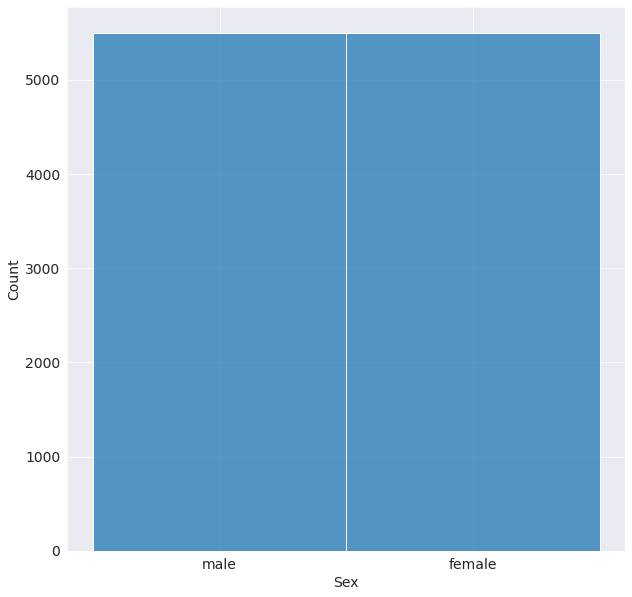

In [21]:
#Setting the figure dimensions
fig, ax = plt.subplots(figsize=(10, 10))

sns.histplot(data=df, x="Sex")

By this histogram, we can see that both genders will be represented equally in this analysis. We have to make sure there is no bias towards any genders to ensure a quality analysis.

**COUNTPLOT** - This function helps to count the no of type elements in a certain column. Therefore, it can be used to determine all the age groups in this dataset. Not to mention, the function will count them individually, so biased age groups can be identified.

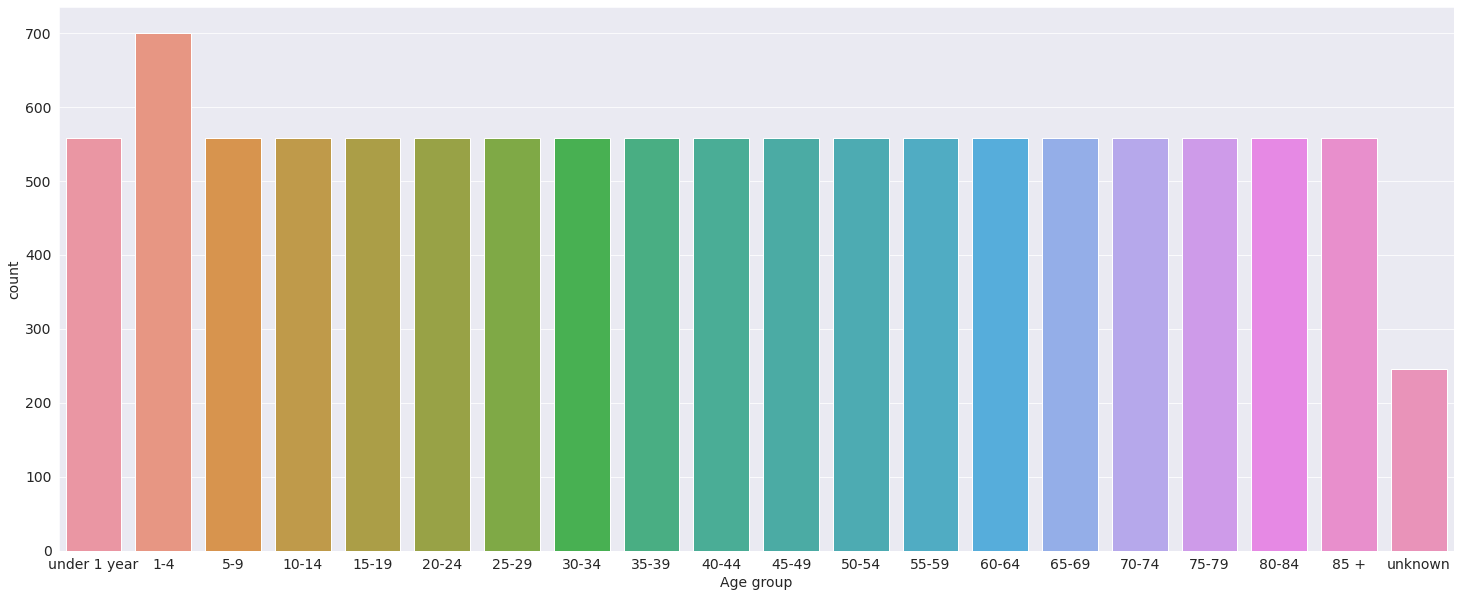

In [22]:
#Setting the figure dimensions
fig, ax = plt.subplots(figsize=(25, 10))
sns.countplot(data=df, x='Age group')

Just like before, we have to make sure there is no bias towards any age group in the analysis. The count plot is used in this case, which functions to count the amount of times each category is recorded in dataframe. <br><br>
The count plot depicts that every age group is equally depicted. However, years 1-4 is recorded more that the rest of the years. There is also a significant amouunt of unknown age groups in this dataframe. <br><br>
This begs the question, why did we not remove the age group unknown altogether. These records could mean something, which could be analysed. Besides, when we are analysing a specific age group, the age group "unknown" could easily be filtered out.


**Line Graph** - Deaths over Time

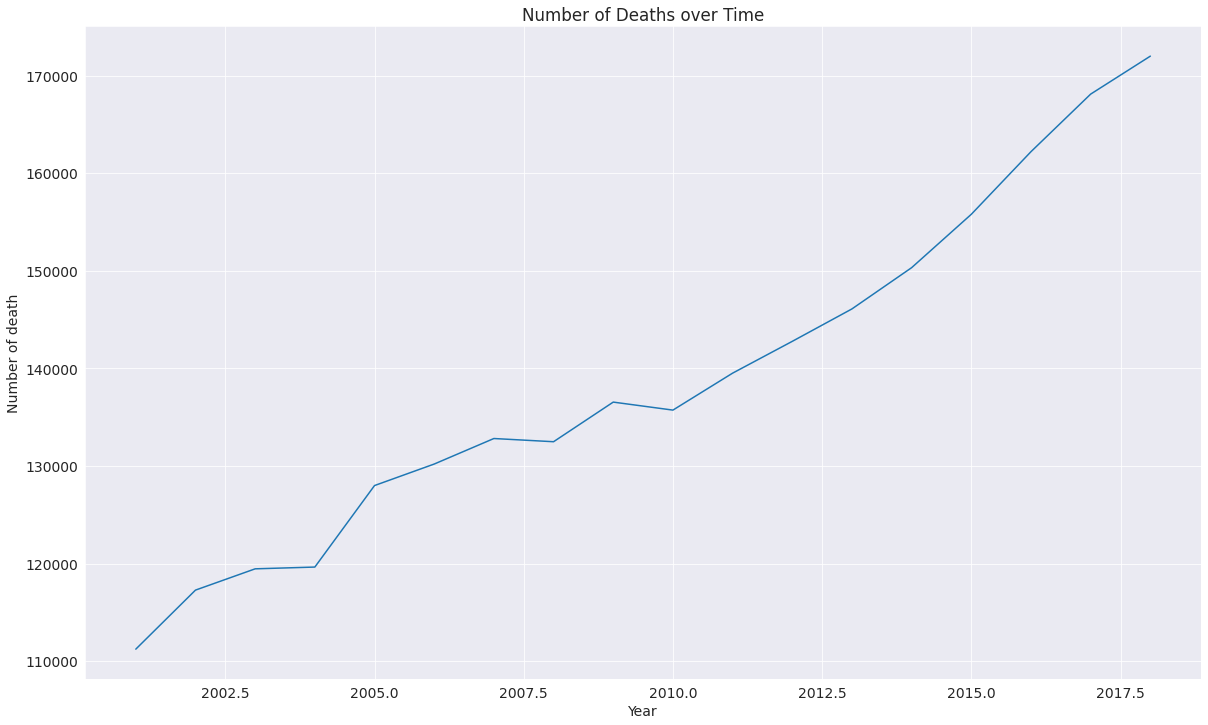

In [35]:
#Setting the figure dimensions
fig, ax = plt.subplots(figsize=(20, 12))

#Grouping Year together with Number of death
grouped = df.groupby(by=['Year'])["Number of death"].sum().reset_index()

# draw lineplot
sns.lineplot(x="Year", y="Number of death", data=grouped)

# setting the title using Matplotlib
plt.title('Number of Deaths over Time')

plt.show()

The line graph above depicts the trend of number of deaths across all age groups, sex and state. To get this depiction, we had to group all data together by years and sum the number of death across them. Then only the line graph can be plotted.
<br><br>
Just by glancing at this graph, one might think the graph will be at a downward trend. However, our dataset from the **Department of Statistics Malaysia** shows something entirely different. In fact, the graph is at a upward trend.
<br><br>
This is might be an issue that has to be addressed. The obvious question is why this **might** be an issue, this is because it could have been caused by the increasing population in Malaysia itself.
<br><br>
Malaysia Population:
* 2001 : 23.71 Million
* 2018 : 31.53 Million
<br> Source : [Data Commons](https://datacommons.org/tools/timeline#&place=country/MYS&statsVar=Count_Person), a project by Google


**Bar Plot** - The barplot() shows the relation between a categorical variable and a continuous variable. In this case, we are going to show the relationship between State, Sex with Number of Death

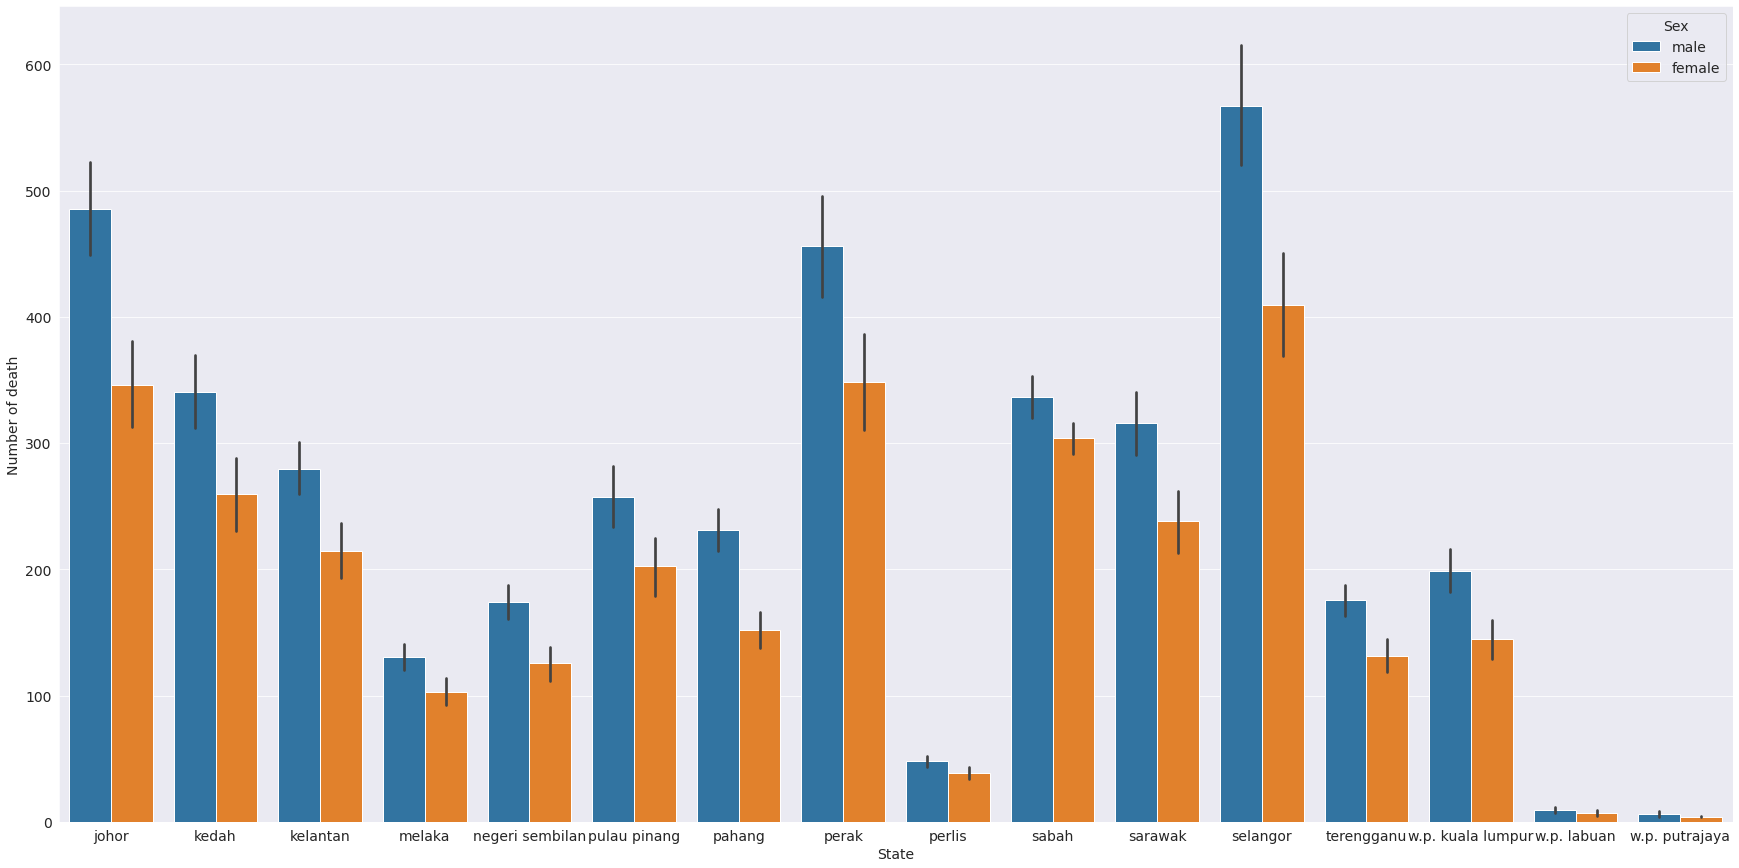

In [24]:
#Setting the figure dimensions
fig, ax = plt.subplots(figsize=(30, 15))

#Plotting the Figure
sns.barplot(x = "State", y = "Number of death", hue = "Sex", data = df)
plt.show()

The bar plot above shows the number of deaths in total across all states in Malaysia. The barplot function allows for multiple bar plots when comparing among the data set is to be done when one variable is changing. This function is used to depict difference in the number of deaths and sex in each state.
<br><br>
Of course, here there are some states with a unusually higher number of deaths. Again, this could be directionally proportional to the population in each of the states in question.
<br><br>
One thing is very obvious from the figure a more developed state or if the state has more land mass in general, it will show a higher number of death. For example, Selangor being a more developed city capable of accomodating more people, is showing a higher number of deaths than the island Melaka.

**Box Plot** - will show the distribution of quantitative data which in our case is Number of death in a way that facilitates comparisons between variables or across levels of a categorical variable. Categorical variable, that will be used in this case will be Sex.

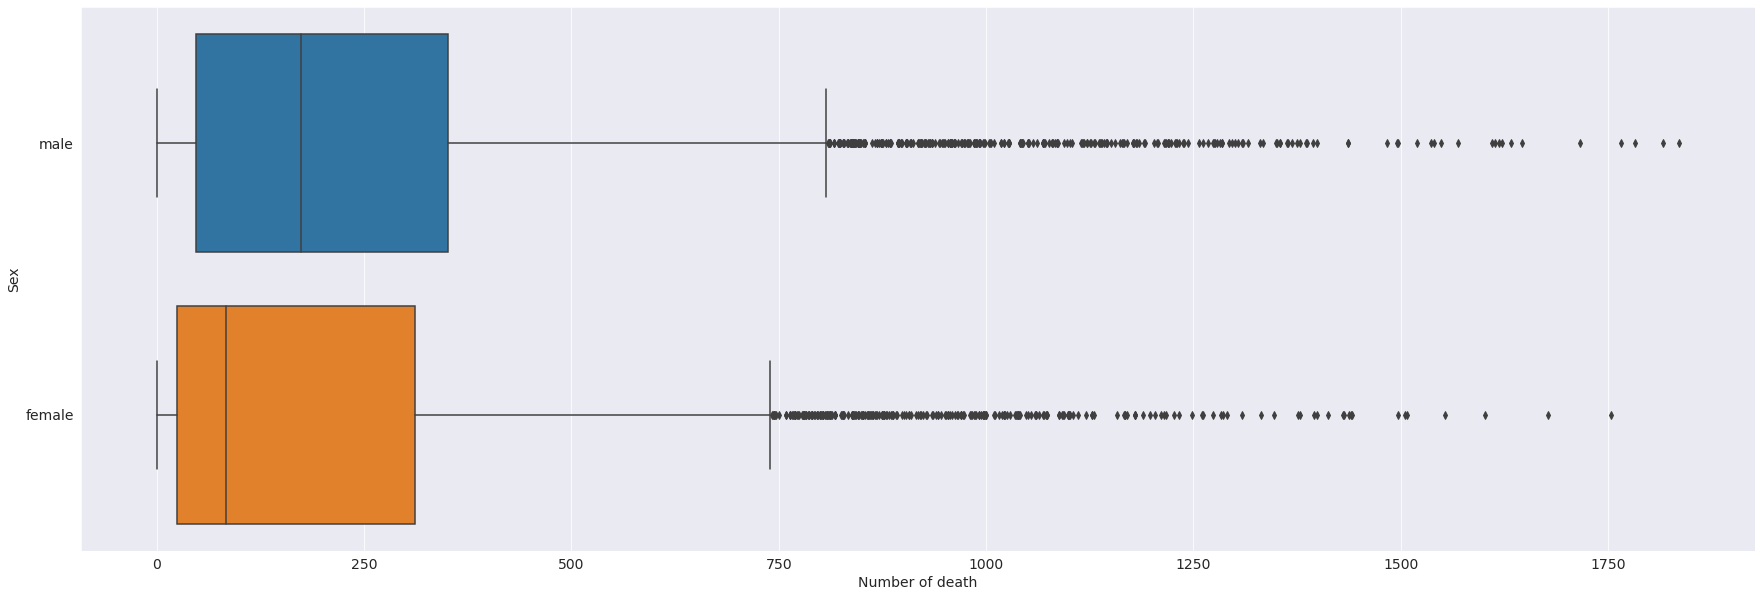

In [42]:
#Grouping Year together with Number of death
grouped = df.groupby(by=['Sex','Year'])["Number of death"].sum().reset_index()

#Setting the figure dimensions
fig, ax = plt.subplots(figsize=(30, 10))

sns.boxplot(data = df, x = 'Number of death', y = 'Sex')

A box plot, also known as a box-and-whisker plot, visualises the distribution of numerical data in a way that makes it easy to compare one variable with another or different levels of a category variable. Except for points that are identified as "outliers" using a technique that is a function of the inter-quartile range, the box displays the dataset's quartiles, and the whiskers expand to display the remainder of the distribution.
<br><br>
First of all we need to group according to sex and year and sum the number of deaths based on these categories. These means we will be analysing the number of deaths between both genders across the years.
<br><br>
Using our dataset, we can see that it is not as evenly distributed as it could be. There are many outliers, which means the number of deaths between the genders across the years is varied.

**Scatterplot** - This function helps to make a diagram where each value in the data set is represented by a dot. For our case we will be wanting to see the relationship between Sex and Age group when it comes to Number of deaths

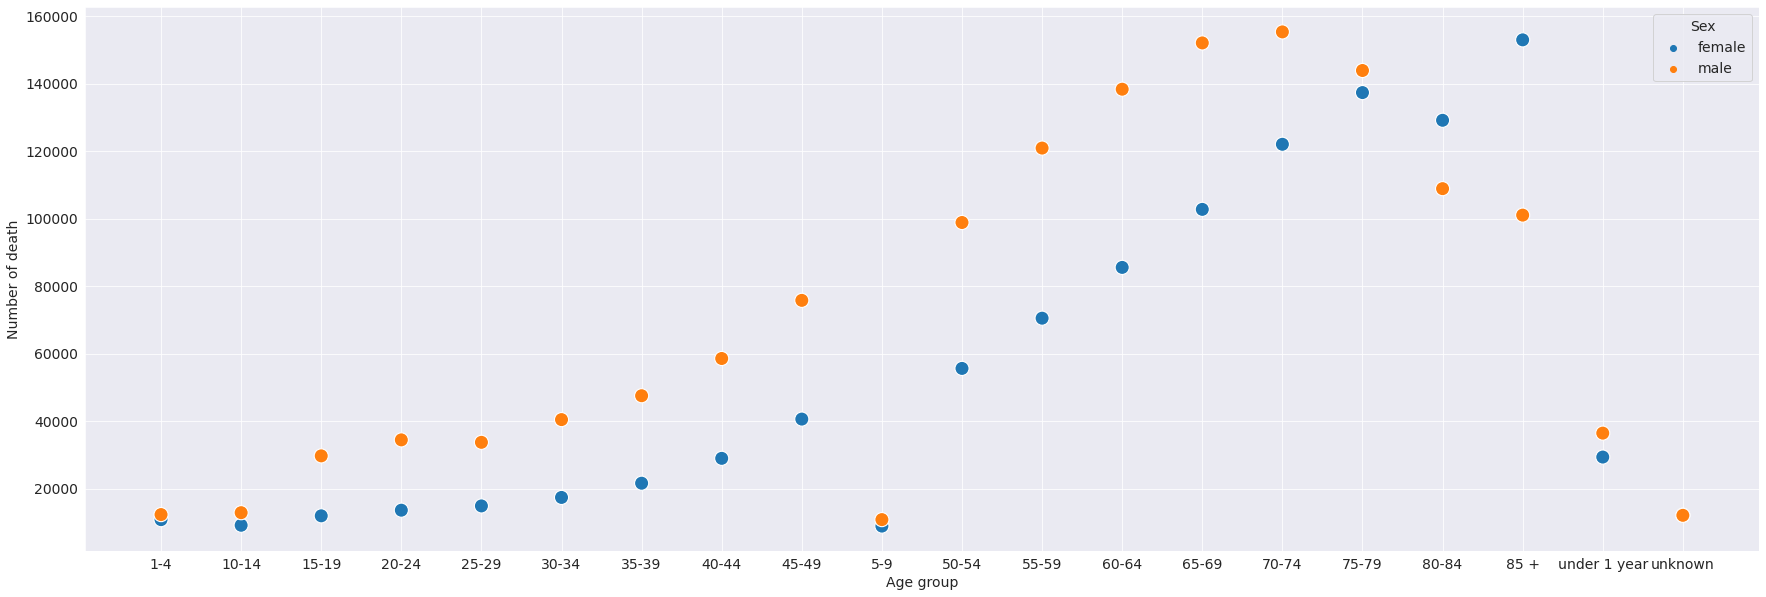

In [26]:
#Setting the figure dimensions
fig, ax = plt.subplots(figsize=(30, 10))

#Grouping Age group and sex together with Number of death
grouped = df.groupby(by=['Age group', 'Sex'])["Number of death"].sum()

#Converting Series to DF
dataframe = grouped.to_frame()

#Plotting
sns.scatterplot(data=dataframe, x='Age group', y='Number of death', hue = 'Sex', s=200)

Scatterplot, is a depiction that is commonly used to 2 different numeric data. In our case the two different numeric data will be number of deaths between male and female. The scatterplot also shows the relationship between age groups and the number of deaths, which can lead to interesting conclusions.
<br><br>
One of which, is with age the number of death increases. This is expected as life span for a human is expected to be 70 Years or higher. But one thing that is interesting is that there are a higher number of females recorded at the age of 85+. Additionally, more males are recorded before the 85 age mark. This means life span for females in Malaysia is higher than the males.
<br><br>

## Asking and Answering Questions



#### Q1: Does number of deaths decrease for each gender over the years?

Sex,female,male
Year,,
2001,48366.803922,62870.803922
2002,51059.372549,66226.372549
2003,51674.372549,67791.372549
2004,51617.372549,68029.372549
2005,56155.023028,71842.023028


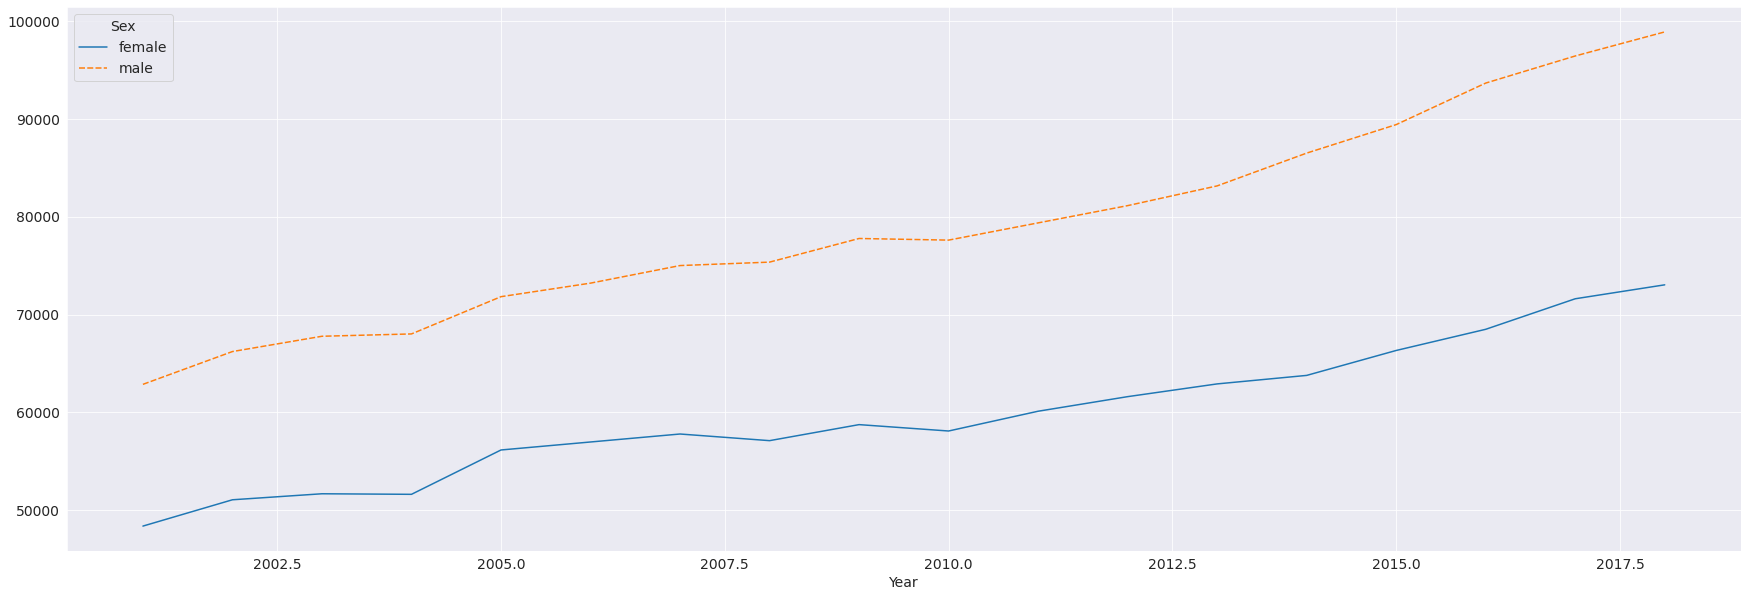

In [27]:
#Setting the figure dimensions
fig, ax = plt.subplots(figsize=(30, 10))

#Grouping Year and sex together with Number of death
grouped = df.groupby(by=['Year', 'Sex'])["Number of death"].sum().reset_index()

#Pivot the dataframe to a wide-form representation
grouped_wide = grouped.pivot("Year", "Sex", "Number of death")

#Plotting
sns.lineplot(data=grouped_wide)

grouped_wide.head()

A common misconception, is that quality of life in Malaysia is getting higher as the days go by. Factors such as the population of the country goes unseen.
<br><br>
In the plot above, we want to see if the number of deaths decrease over time. As and additional step, gender also will be taken into consideration.
<br><br>
As a start, the data will be grouped into years and sex. Then the dataframe produced will be pivotted, which is a function that reshapes the data based on column values. This function is similar to Miscrosoft Excel's pivot table function. With the new dataframe, a line plot depicting number of deaths of each sex over the years can be plotted.
<br><br>
**Answer :** No, number of deaths does not decrease over time. As a matter of fact it increases proportionally with time.

#### Q2: Which state recorded the most deaths in each year in the data?

In [28]:
from pandas import merge

#Grouping Year group and State together with Number of death
grouped = df.groupby(by=['Year', 'State'])["Number of death"].sum().reset_index()


#Pivot the dataframe to a wide-form representation
grouped_wide = grouped.pivot("Year", "State", "Number of death")

#Create two series with highest deaths represented by state and the number of deaths itself
indexMax = grouped_wide.idxmax(axis = 1)
#Convert to dataframe
indexMax = indexMax.to_frame()
deathMax = grouped_wide.max(axis = 1)
deathMax = deathMax.to_frame()

#Rename  columns and present the results
results = pd.merge(indexMax, deathMax, on='Year')
results.rename(columns = {'0_x':'State', '0_y':'Deaths'}, inplace = True)
results

,State,Deaths
Year,,
2001,perak,13577.000000
2002,perak,14345.000000
2003,perak,14561.000000
2004,selangor,14616.000000
2005,selangor,15823.950068
2006,selangor,16147.950068
2007,selangor,16355.950068
2008,selangor,17649.000000
2009,selangor,18373.000000


This question is brought up mainly because of the common conception that the highly populated states will tend to have higher number of deaths. Since we have the dataset to prove this conception right or wrong, it is fair that we do it.
<br><br>
First of all we grouped the data by Year and State and then we pivotted it. After this, we had to find the max value in of the year which can be dont using maxidx method. But this only returns the name of the state that possess the highest number of deaths. For more significance, we used max method to find out the exact number of deaths so we can compare more easily. Of which we then merged with the series created by maxidx method.
<br><br>
The results clearly shows that even though selangor appeared multiple times with increasing number of deaths over the years, perlis also could appear given some factors going their way.

#### Q3: Which state has recorded the most death at infancy ages?

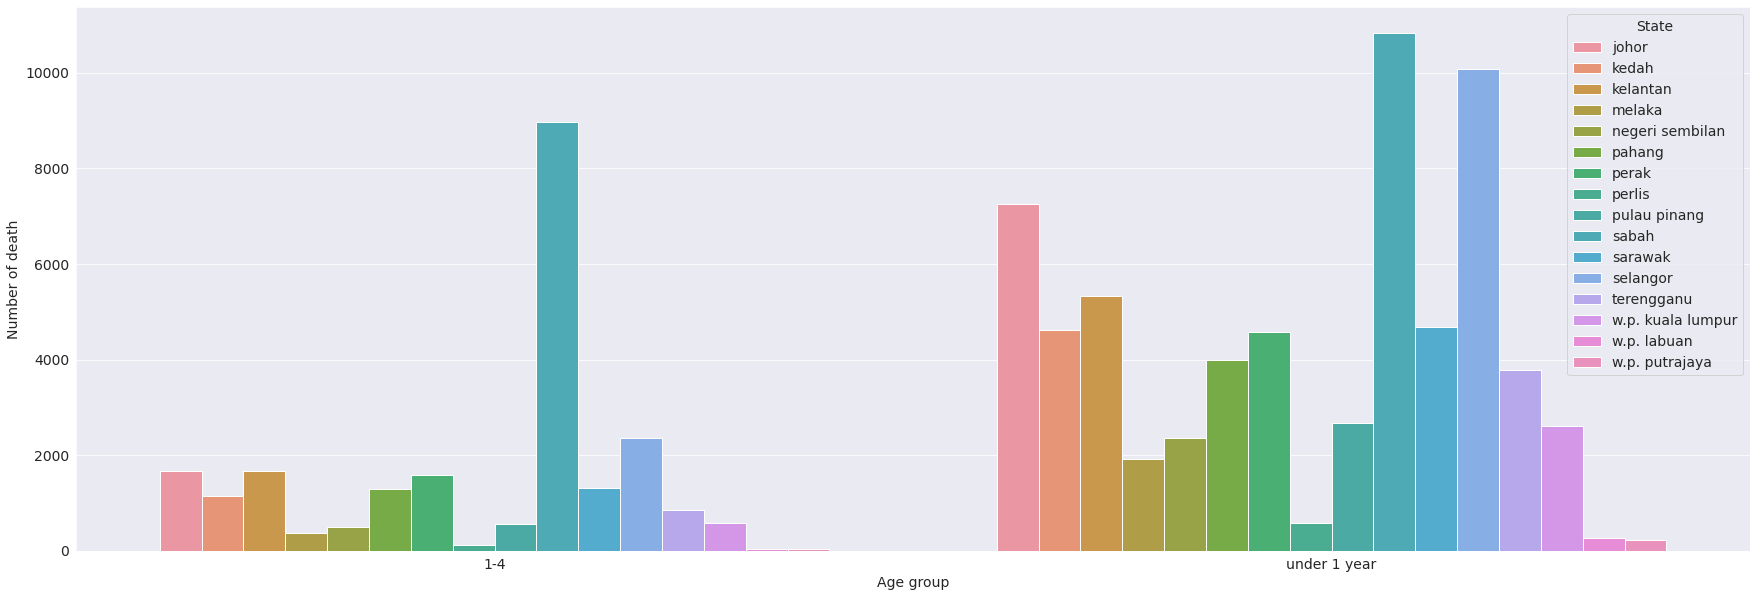

In [29]:
#Setting the figure dimensions
fig, ax = plt.subplots(figsize=(30, 10))

#Grouping Age group and State together with Number of death
grouped = df.groupby(by=['Age group', 'State'])["Number of death"].sum().reset_index()

#Filtering out age group
infancyAge = ['1-4', 'under 1 year']
    
# selecting rows based on age group 
filtered = grouped.loc[grouped['Age group'].isin(infancyAge)]

#plotting
sns.barplot(x = "Age group", y = "Number of death", hue = "State", data = filtered)
plt.show()

After analysing depictions before just out of curiousity, we wanted to see wheter if states has anything to do with infancy deaths. Ages under 5 years old, will be represented as infancy ages.
<br><br>
Just as before we had to group the Age group and state together with number of deaths. However this time we had to filter out ages other than ages 5 and below.
Since ages is represented by a string we had to select ages under 5 and store them in a list. Which is then used by isin function to reference and filter out every data that has ages 5 and up. The data of which is then used to create a multiple bar plot, which can show the relationship between states, age groups and number of deaths.
<br><br>
**Answer :** The results shown is interesting, first things first Sabah recorded the most number of infant deaths. But Selangor is a close second, and being one of the most advanced state in Malaysia, one would think that this state has the best medication and logistics to handle complications in infancy health. From another angle, this could just be overshadowed by other factors such as population again.

#### Q4: What is the trend of infancy deaths in Selangor?

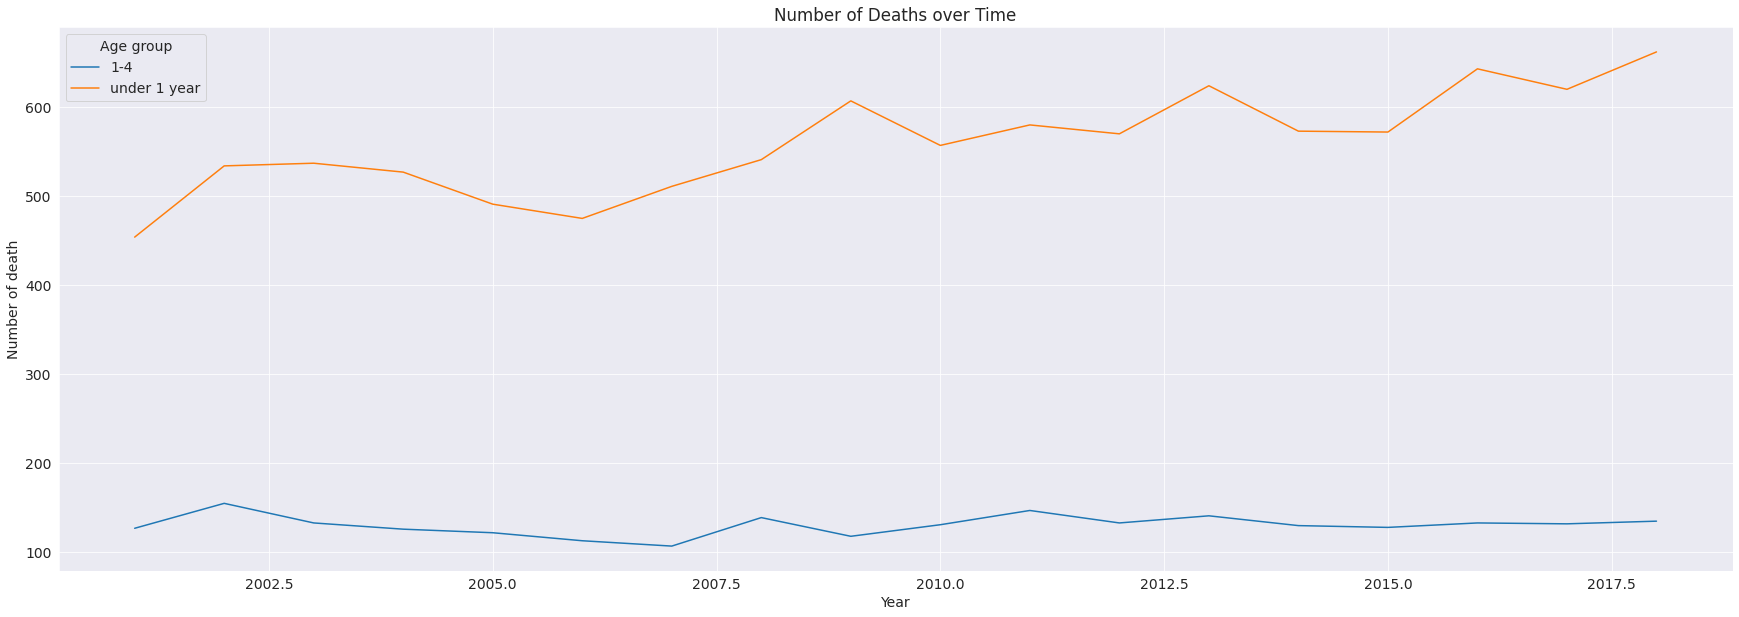

In [30]:
#Setting the figure dimensions
fig, ax = plt.subplots(figsize=(30, 10))

#Grouping Age group and State and Year together with Number of death
grouped = df.groupby(by=['State','Year','Age group'])["Number of death"].sum().reset_index()

#Filtering out age group and state
infancyAge = ['1-4', 'under 1 year']
stateList = ['selangor']
    
# selecting rows based on age group and Selangor
filtered = grouped.loc[grouped['Age group'].isin(infancyAge)]
filtered = filtered.loc[filtered['State'].isin(stateList)]
filtered

# draw lineplot
sns.lineplot(x="Year", y="Number of death", data=filtered, hue='Age group')

#setting the title using Matplotlib
plt.title('Number of Deaths over Time')

plt.show()

This question was produced from the answers of the last 2 questions, which is Selangor has the highest number of deaths compared to any other state as well as selangor has recorded a really high number of deaths when it comes to infants. So the natural question would be what is the trend in infancy deaths for the state Selangor.
<br><br>
Of course, we have to group the dataset by state, year, and age group. Of which then we have to filter out infants from Selangor. Using the dataset produced, we can plot a line graph to compare the trend of infants deaths over the years.
<br><br>
**Answer :** From the line plot we can see that infants under year one is seeing a higher number of deaths over the years, but infants in the age group of 1 to 4 years of age is seeing consistent number of deaths over the years.

#### Q5: Which state recorded the most elderly deaths?

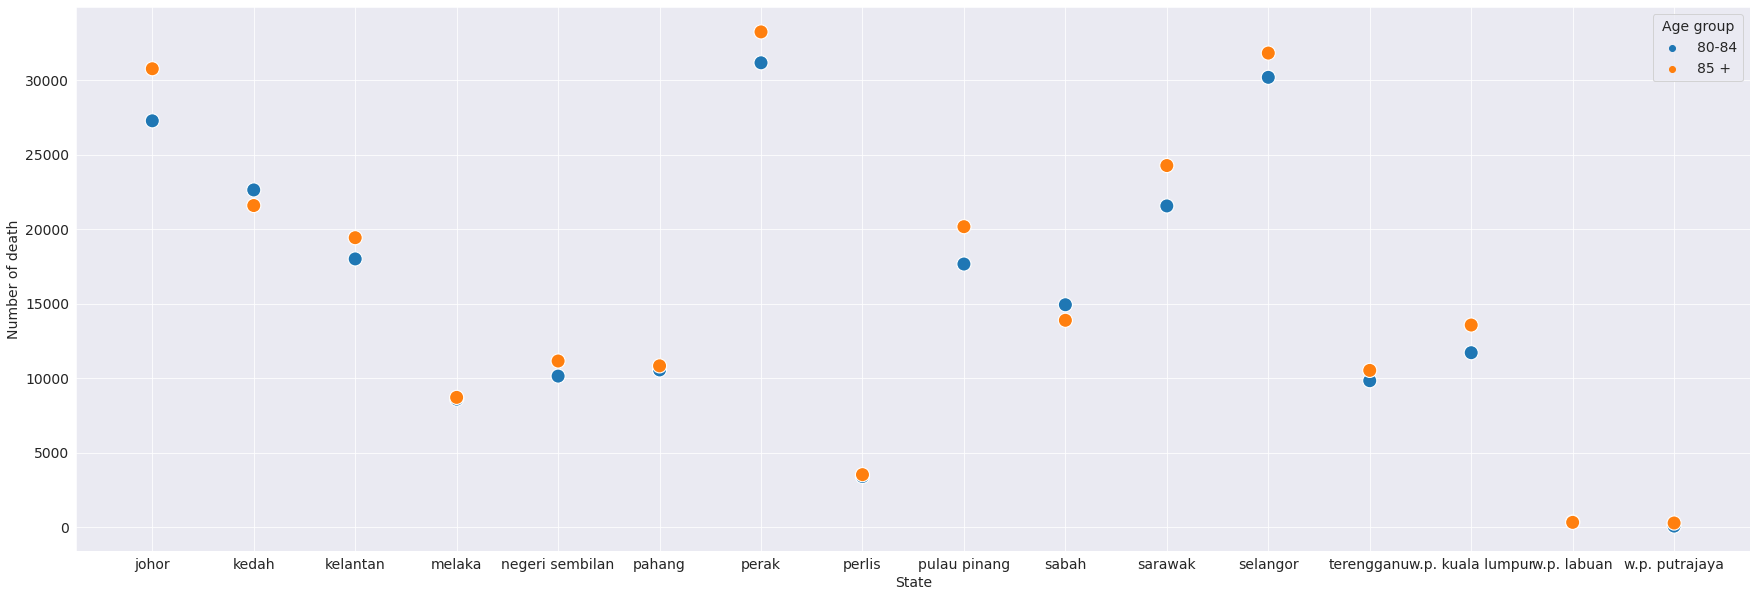

In [31]:
#Setting the figure dimensions
fig, ax = plt.subplots(figsize=(30, 10))

#Grouping Age group and State together with Number of death
grouped = df.groupby(by=['State','Age group'])["Number of death"].sum().reset_index()

#Filtering out elderly age group
elderlyAge = ['80-84', '85 +']
    
# selecting rows based on age group
filtered = grouped.loc[grouped['Age group'].isin(elderlyAge)]
filtered

# draw scatterplot
sns.scatterplot(data=filtered, x='State', y='Number of death', hue='Age group', s=200)

For the final question, this time it is only fair to analyse elderly deaths across Malaysia. So we was curious about which state recorded the highest number of deaths in general.
<br><br>
To achieve this, we had to group the data by State and age group. The dataframe produced will have all the ages below 80 filtered out. Both of the steps are explained in the questions before. To make it easier to analyse, we used a scatterplot as we have 2 different age groups and many states.
<br><br>
**Answer :** This time, perak recorded the most deaths among the elderly followed by Selangor and Johor.
<br><br>

## Inferences and Conclusion

**TODO** - Write some explanation here: a summary of all the inferences drawn from the analysis, and any conclusions you may have drawn by answering various questions.

In conclusion, studying a dataset in Python entails investigating its properties and organisation, locating any blank or partial values, and looking for links and trends. To gather insights and form judgements about the data, this can entail utilising a variety of methods and tools, including value counts, aggregation, visualisation, and statistical analysis.



Based on the analysis, the highest death count happened from age group of 1-4 from 2001- 2018. Besides, it can also be concluded that as per the year passes by from 2001- 2018, the total number of death increases gradually. Next, it can be shown that the total number of death in male is higher than the total number of death in female in every state. Finally, the total number of deaths were lead by male from age group 1-4 until 75-79. Meanwhile, the toatal number of death from age group 80-85 until 85+ were lead by female. 

## References and Future Work

**TODO** - Write some explanation here: ideas for future projects using this dataset, and links to resources you found useful.

Learning [Matplotlib](https://matplotlib.org/)

Visualization with [Seaborn](https://www.w3schools.com/python/numpy/numpy_random_seaborn.asp)

Validation with [Data Commons](https://datacommons.org/tools/timeline#&place=country/MYS&statsVar=Count_Person)

Some fo the future work that can be done with the dataset: 

1. Predictive modeling: Machine learning techniques could be used to build predictive models that forecast the number of death in the future. This could be useful for public health planning and nation's population control.

2. Evaluation of interventions: The data could be used to evaluate the effectiveness of different interventions, such as proper medication for severe death causes or proper vaccination for childrens below age 7 to reduce the death rate, in reducing the number of death rate caused by weak healthcare.